# Assignment

### Implementing artificial neural network (ANN) to classify the MNIST dataset of hand written numbers as a assignment in the corse TDT4265 Computer Vision and Deep Learning

Start by importing libraries and code from assignment_code folder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from assignment_code import utils
from assignment_code import softmaxTrainer as st
from assignment_code import softmaxModel as sm

Loading dataset

In [2]:
X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
X_train = st.pre_process_images(X_train)
X_val = st.pre_process_images(X_val)
Y_train = st.one_hot_encode(Y_train, 10)
Y_val = st.one_hot_encode(Y_val, 10)

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)


Defines the hyper parameters

In [3]:
#Hyper parameters
num_epochs = 50
learning_rate = 0.01
batch_size = 128
l2_reg_lambda = 0
shuffle_dataset = True

Initializes and trains the modell

In [4]:
# Intialize
model = sm.SoftmaxModel(l2_reg_lambda)

# Train
trainer = st.SoftmaxTrainer(model, learning_rate, batch_size, shuffle_dataset, X_train, Y_train, X_val, Y_val,)
train_history, val_history = trainer.train(num_epochs)

EpochNo: 0
EpochNo: 1
EpochNo: 2
EpochNo: 3
EpochNo: 4
EpochNo: 5
EpochNo: 6
EpochNo: 7
EpochNo: 8
EpochNo: 9
EpochNo: 10
EpochNo: 11
EpochNo: 12
EpochNo: 13
EpochNo: 14
EpochNo: 15
EpochNo: 16
EpochNo: 17
EpochNo: 18
EpochNo: 19
EpochNo: 20
EpochNo: 21
EpochNo: 22
EpochNo: 23
EpochNo: 24
EpochNo: 25
EpochNo: 26
EpochNo: 27
EpochNo: 28
EpochNo: 29
EpochNo: 30
EpochNo: 31
EpochNo: 32
EpochNo: 33
EpochNo: 34
EpochNo: 35
EpochNo: 36
EpochNo: 37
EpochNo: 38
EpochNo: 39
EpochNo: 40
EpochNo: 41
EpochNo: 42
EpochNo: 43
EpochNo: 44
EpochNo: 45
EpochNo: 46
EpochNo: 47
EpochNo: 48
EpochNo: 49


In [5]:
print("Final Train Cross Entropy Loss:",
      sm.cross_entropy_loss(Y_train, model.forward(X_train)))
print("Final Validation Cross Entropy Loss:",
        sm.cross_entropy_loss(Y_val, model.forward(X_val)))
print("Final Train accuracy:", st.calculate_accuracy(X_train, Y_train, model))
print("Final Validation accuracy:", st.calculate_accuracy(X_val, Y_val, model))

Final Train Cross Entropy Loss: 0.2800335875350492
Final Validation Cross Entropy Loss: 0.29902402393704086
Final Train accuracy: 0.9225
Final Validation accuracy: 0.9157


Plots the loss and accuracy of the model

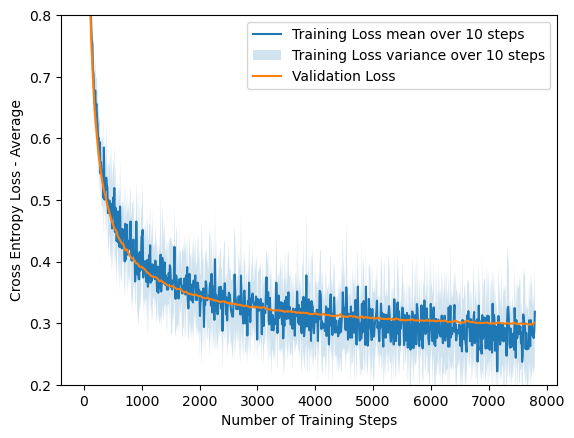

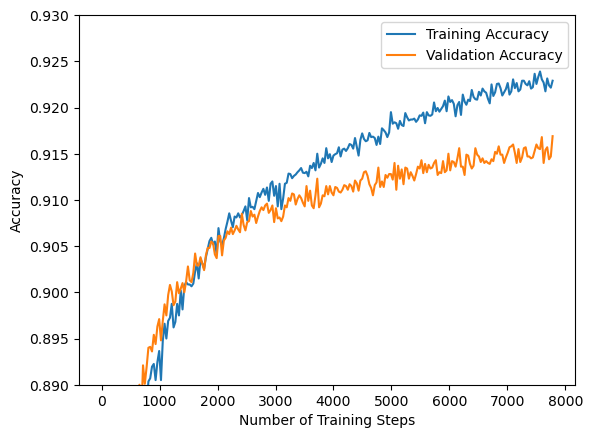

In [6]:
# Plot loss
plt.ylim([0.2, .8])
utils.plot_loss(train_history["loss"],"Training Loss", npoints_to_average=10)
utils.plot_loss(val_history["loss"], "Validation Loss")
plt.legend()
plt.xlabel("Number of Training Steps")
plt.ylabel("Cross Entropy Loss - Average")
plt.show()

# Plot accuracy
plt.ylim([0.89, .93])
utils.plot_loss(train_history["accuracy"], "Training Accuracy")
utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
plt.xlabel("Number of Training Steps")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Trains a model with same hyper paramters as above, but uses L2 regularization with lambda = 1

In [7]:
# Training a model with L2 regularization
model1 = sm.SoftmaxModel(l2_reg_lambda=1.0)
trainer = st.SoftmaxTrainer(model1, learning_rate, batch_size, shuffle_dataset,X_train, Y_train, X_val, Y_val,)
train_history_reg01, val_history_reg01 = trainer.train(num_epochs)

EpochNo: 0
EpochNo: 1
EpochNo: 2
EpochNo: 3
Early stopping at epoch number: 3


To better understand the concept of regularization, I visualized the weights from the ANN. The top row represents the results without regularization, while the bottom row depicts the effects of applying regularization.

As we can observe, regularization creates a more generalized image that aligns with our expectations of how digits should appear, whereas the top row tends to be noisier and tailored to the specifics of our training dataset.

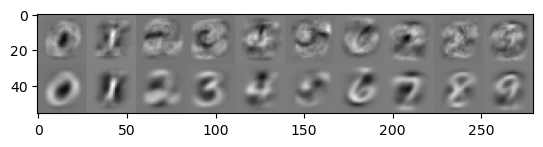

In [8]:
weights = model.w.T
image = weights[0][:784]
image.shape = (image.size//28, 28)
for i in range(1, 10):
    im = weights[i][:784]
    im.shape = (im.size//28, 28)
    image = np.hstack((image, im))

weights1 = model1.w.T
image1 = weights1[0][:784]
image1.shape = (image1.size//28, 28)
for i in range(1, 10):
    im = weights1[i][:784]
    im.shape = (im.size//28, 28)
    image1 = np.hstack((image1, im))

#Normalize the images
image = image/np.max(image)
image1 = image1/np.max(image1)

image = np.vstack((image, image1))

#plt.imsave("task4b_softmax_weight.png", image, cmap="gray")
plt.imshow(image, cmap="gray")
plt.show()